In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.datasets import fashion_mnist

In [38]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset") 

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [42]:
np.unique(y_train)  #we have 10 output

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

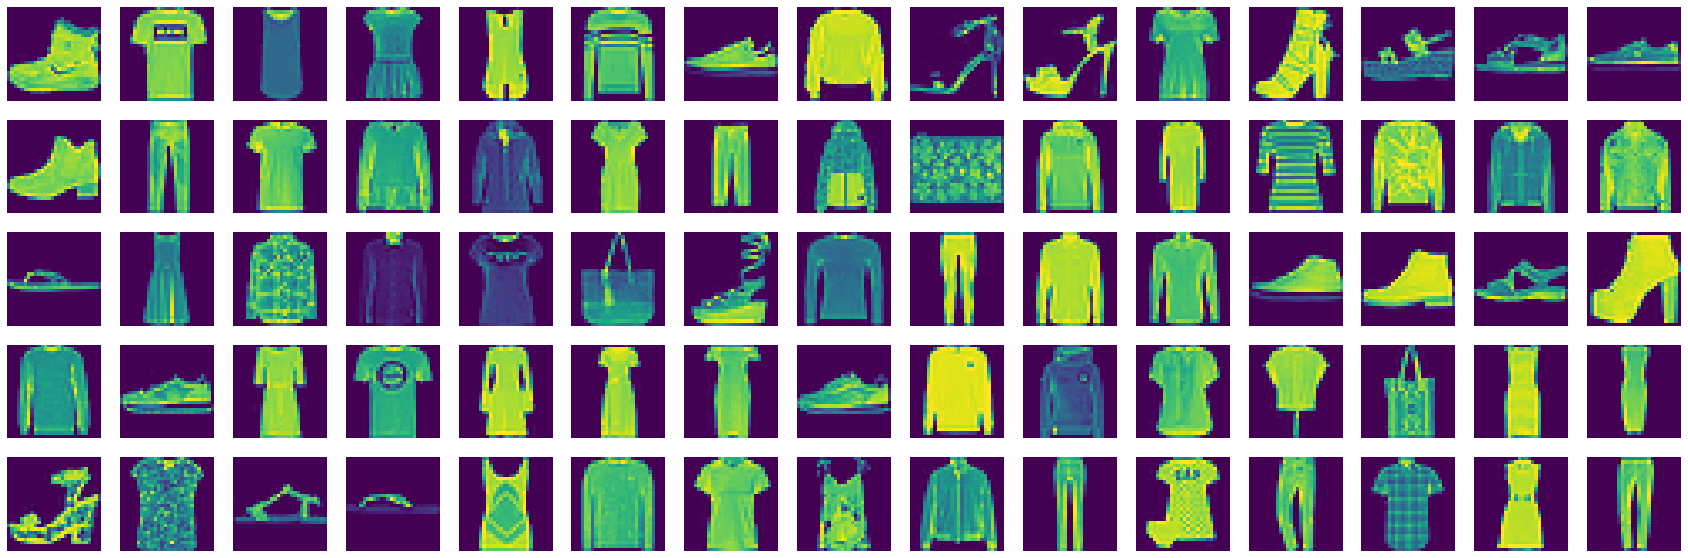

In [43]:
fig = plt.figure(figsize=(30,10))

for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(X_train[i]) # +cmap= plt.cm.binary for original color of object
    
    plt.axis('off')

plt.show()

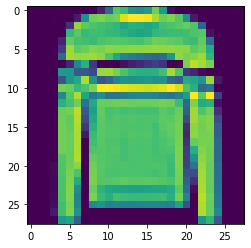

In [44]:
plt.imshow(X_train[5])

In [45]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [46]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [47]:
from tensorflow.keras.utils import to_categorical

In [48]:
Y_train = to_categorical(y_train,10)  #10 is for output
Y_test = to_categorical(y_test,10)

In [52]:
Y_train[5]  

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [53]:
y_train[5]

2

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [85]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])



In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                173088    
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                      

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
early_stop = EarlyStopping(monitor='val_loss, patience=10')

In [89]:
model.fit(X_train,Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.8330

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4743 - accuracy: 0.8330 - val_loss: 0.3734 - val_accuracy: 0.8675
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.3416 - accuracy: 0.8770

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3416 - accuracy: 0.8770 - val_loss: 0.3336 - val_accuracy: 0.8762
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.3005 - accuracy: 0.8912

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3006 - accuracy: 0.8912 - val_loss: 0.3104 - val_accuracy: 0.8892
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2762 - accuracy: 0.8996

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2762 - accuracy: 0.8996 - val_loss: 0.2952 - val_accuracy: 0.8941
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.2539 - accuracy: 0.9069

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2538 - accuracy: 0.9069 - val_loss: 0.2776 - val_accuracy: 0.9004
Epoch 6/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9120

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2390 - accuracy: 0.9121 - val_loss: 0.2812 - val_accuracy: 0.9010
Epoch 7/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.9170

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2239 - accuracy: 0.9169 - val_loss: 0.2685 - val_accuracy: 0.9060
Epoch 8/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9195

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2152 - accuracy: 0.9195 - val_loss: 0.2742 - val_accuracy: 0.9054
Epoch 9/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.2054 - accuracy: 0.9235

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2056 - accuracy: 0.9235 - val_loss: 0.2715 - val_accuracy: 0.9057
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9252

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1994 - accuracy: 0.9252 - val_loss: 0.2840 - val_accuracy: 0.9031


In [90]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.474290,0.832983,0.373367,0.8675
1,0.341565,0.877000,0.333552,0.8762
2,0.300609,0.891233,0.310369,0.8892
3,0.276181,0.899617,0.295150,0.8941
4,0.253797,0.906950,0.277564,0.9004


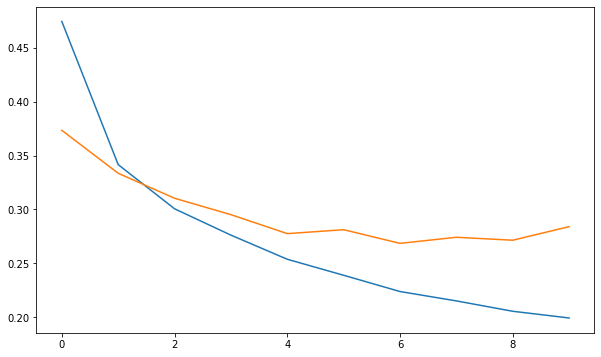

In [91]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)

#after dropout the loss value is decreased

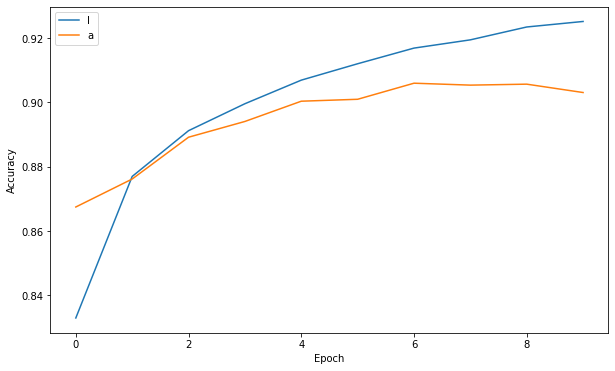

In [100]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # DataFrame' den cekilen accuracy degerleri
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [92]:
model.evaluate(X_test,Y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.2840 - accuracy: 0.9031


[0.2840370833873749, 0.9031000137329102]

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
preds = model.predict(X_test)
preds

313/313 [==============================] - 1s 2ms/step


array([[2.7320488e-07, 1.1921774e-09, 5.0565947e-09, ..., 5.8440916e-04,
        6.2357685e-08, 9.9928397e-01],
       [1.8237788e-05, 7.2296648e-11, 9.9976844e-01, ..., 1.0888273e-19,
        2.7393296e-10, 4.0275375e-15],
       [1.5154787e-10, 9.9999928e-01, 1.1164543e-12, ..., 3.3058043e-19,
        2.3576882e-13, 1.2695051e-16],
       ...,
       [4.0189032e-05, 2.0061868e-06, 1.8642632e-04, ..., 1.1440471e-08,
        9.9721658e-01, 6.4390367e-14],
       [3.5028147e-11, 1.0000000e+00, 2.8223601e-10, ..., 1.4448620e-18,
        6.2633872e-14, 5.6172596e-14],
       [2.7473772e-07, 8.2066080e-08, 3.2306832e-06, ..., 1.1328167e-03,
        2.4934006e-05, 3.4373963e-05]], dtype=float32)

In [98]:
predictions= np.argmax(preds, axis=1)

In [99]:
print(classification_report(Y_test, preds))

ValueError: ignored